In [1]:
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


from scipy.interpolate import RegularGridInterpolator


In [2]:
size = (48, 64)

x = np.zeros(size)

for i in range(10):
    x += np.random.uniform(size=size)
    x = scipy.ndimage.gaussian_filter(x, 1)
x -= np.mean(x)

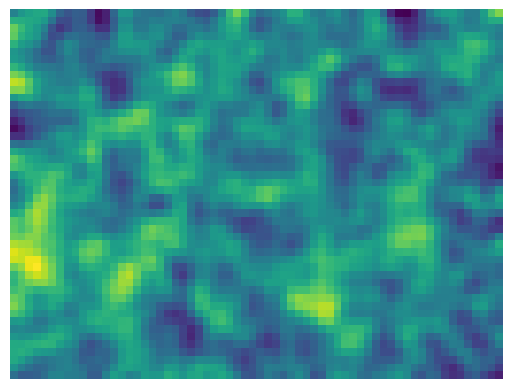

In [3]:
plt.imshow(x)
plt.axis("off")
plt.show()

In [4]:
# Calculate some random vector field via gradient of another noise function

g = np.random.uniform(size=size)
g = scipy.ndimage.gaussian_filter(g, 10)

vx, vy  = np.gradient(g)

In [5]:
# vx = np.zeros(size)
# vy = np.zeros(size)

# px, py = np.meshgrid(np.linspace(-1, 1, size[0]), np.linspace(-1, 1, size[1]), indexing='ij')

# d_sq = (px*px + py*py)
# vx = np.exp(-3*d_sq) * py


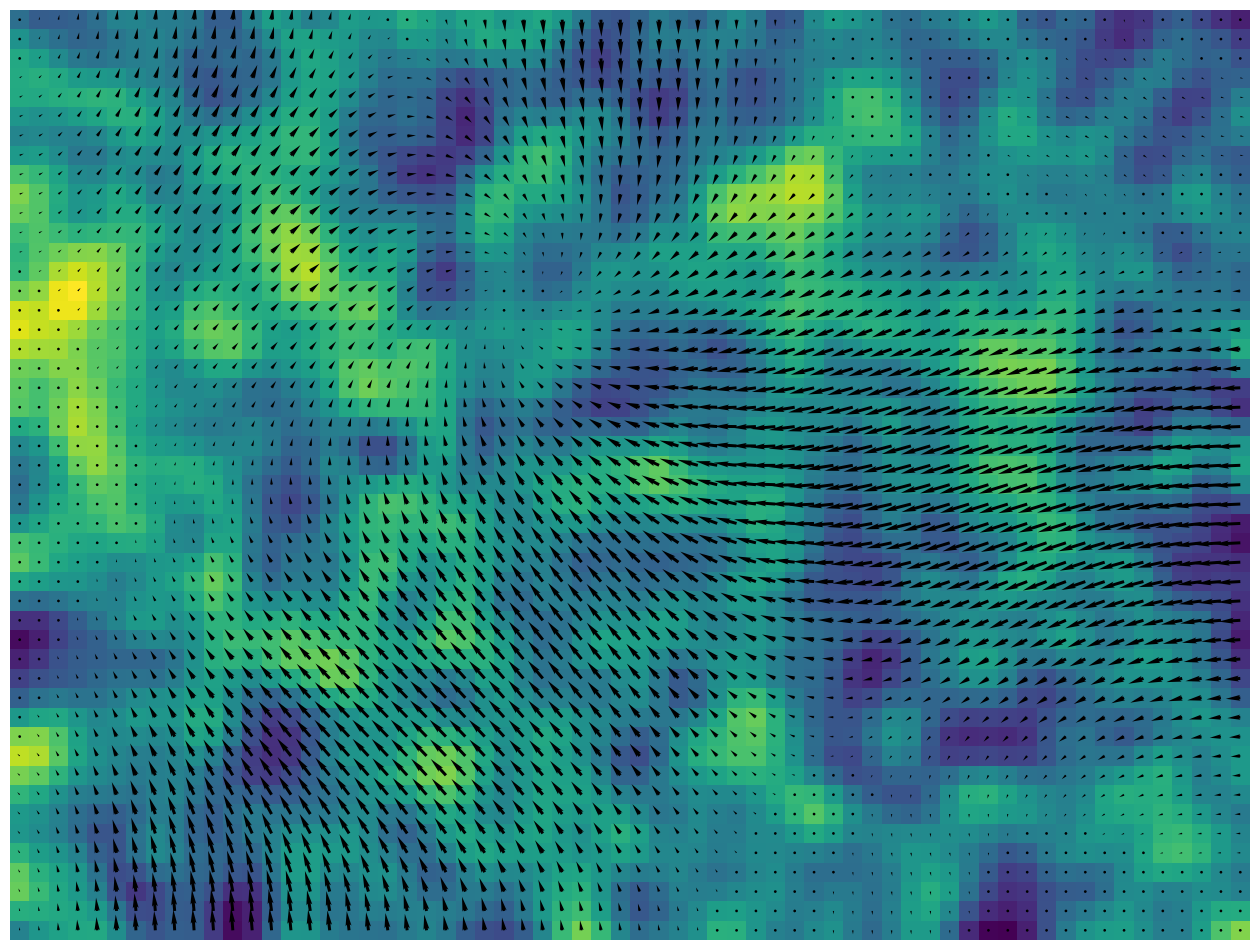

In [6]:
n = 9

plt.figure(figsize=(16, 16))
plt.quiver(vx, vy, headwidth = 2)
# plt.imshow(g, interpolation='none', origin='lower')
plt.imshow(x, interpolation='none', origin='lower')
plt.axis("off")
plt.show()

In [23]:
# Due to indexing the vector field is actually rotated 90 degrees hence (-vy vx) instead of (vx, vy)
v = np.stack([-vy, vx]).transpose((1, 2, 0))
v.shape

(48, 64, 2)

In [24]:
# Normalize it
v = v / np.mean(np.linalg.norm(v, axis = 2))

In [25]:
np.mean(np.linalg.norm(v, axis = 2))

1.0

In [26]:
ax = np.arange(size[0])
ay = np.arange(size[1])


In [28]:
# Object to make interpolation a bit easier

interpolator = RegularGridInterpolator(
            (ax, ay),
            x,
            method="linear",
            bounds_error=False,
            fill_value=0.0,
        )

In [33]:
# Should give the same result:
print(interpolator(np.array([1.0, 2.0])))
print(x[1, 2])

[0.13468977]
0.13468976608689331


In [34]:
# Build grid of coordinates to index
px, py = np.meshgrid(ax, ay, indexing='ij')
p = np.stack([px, py]).transpose((1, 2, 0))


In [35]:
interpolator(p).shape

(48, 64)

In [36]:
v[px, py].shape

(48, 64, 2)

In [41]:
# Now, subtract the velocity vectors from the sample points backwards in time
# delta = timestep
delta = 1
sample_p = p - delta * v[px, py]

In [42]:
s_x = interpolator(sample_p)

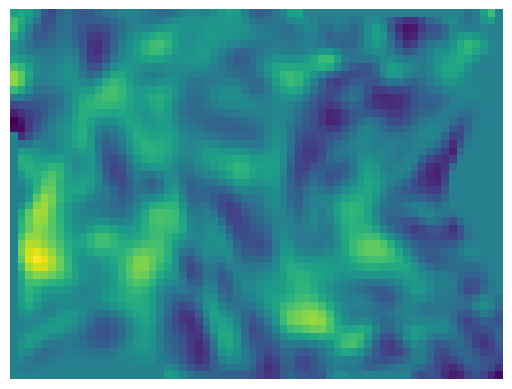

In [43]:
plt.imshow(s_x)
plt.axis("off")
plt.show()

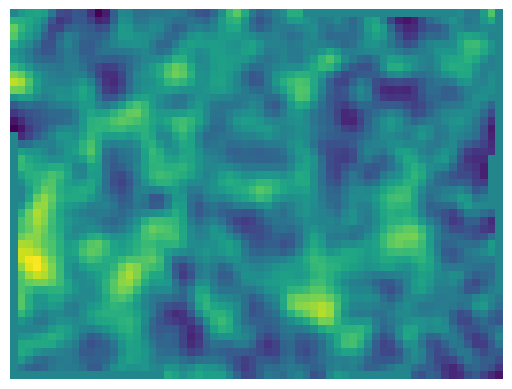

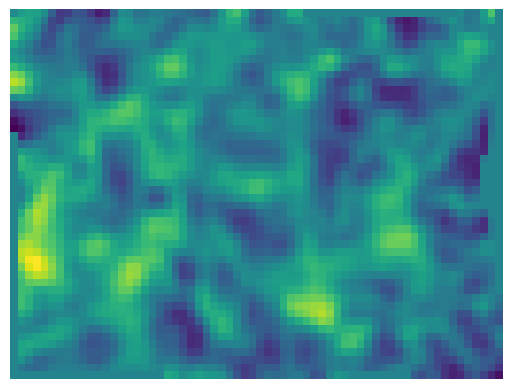

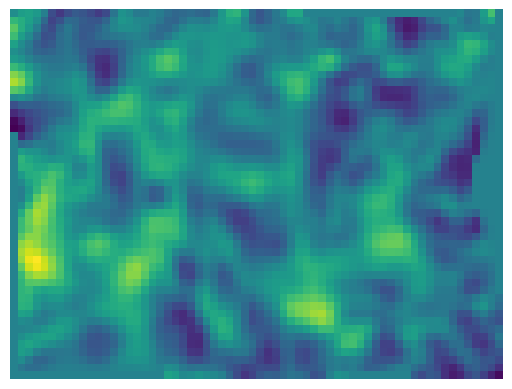

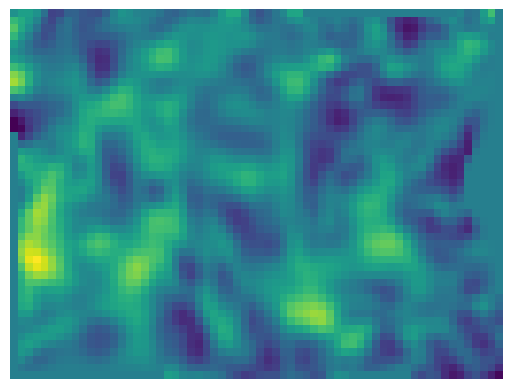

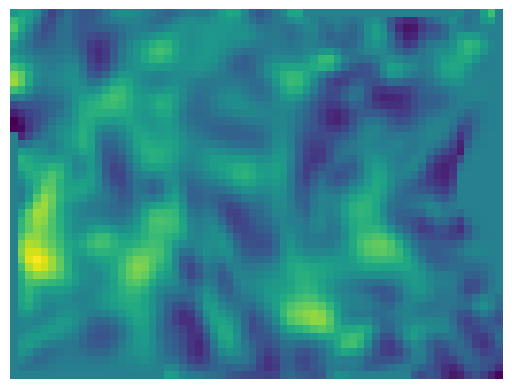

In [44]:
# If we want to run multiple frames we need to rebuild the interpolation object every frame

u = np.copy(x)
delta = 0.5

for i in range(5):
    interpolator = RegularGridInterpolator(
        (ax, ay),
        u,
        method="linear",
        bounds_error=False,
        fill_value=0.0,
    )

    sample_p = p - delta * v[px, py]
    u = interpolator(sample_p)
    
    plt.imshow(u)
    plt.axis("off")
    plt.show()

In [45]:
# Make an animation

u = np.copy(x)
delta = 0.2

def animate(t):
    global u
    
    interpolator = RegularGridInterpolator(
        (ax, ay),
        u,
        method="linear",
        bounds_error=False,
        fill_value=0.0,
    )

    sample_p = p - delta * v[px, py]
    u = interpolator(sample_p)
    plt.imshow(u)
    plt.axis("off")


In [46]:
plt.rcParams["animation.html"] = "jshtml"
plt.ioff()
fig, _ = plt.subplots()

matplotlib.animation.FuncAnimation(fig, animate, frames=20)
